# Compare COVID rates per neighborhood

In [90]:
#imports
import pandas as pd
from matplotlib import pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

%matplotlib inline

In [91]:
# load data for most recent week
all_neighborhoods = pd.read_csv('./neighborhoods-data/covid-rates-nyc-zip-12.csv', sep='\t')
all_neighborhoods.head()


,modzcta,modzcta_name,percentpositivity_7day,people_tested,people_positive,median_daily_test_rate,adequately_tested,daterange
0,10001,Chelsea/NoMad/West Chelsea,2.12,1225,26,822.1,Yes,December 6-December 12
1,10002,Chinatown/Lower East Side,6.34,3027,192,663.8,Yes,December 6-December 12
2,10003,East Village/Gramercy/Greenwich Village,1.63,3625,59,1424.7,Yes,December 6-December 12
3,10004,Financial District,3.04,263,8,1312.2,Yes,December 6-December 12
4,10005,Financial District,3.75,427,16,879.3,Yes,December 6-December 12


In [92]:
# 5 top neighborhoods for essential workers 
# neighborhood 0 is all other 
essential_dict = {
    'Canarsie': 1,
    'Flatlands':1,
    'Jamaica':2,
    'Hollis':2,
    'Queens Village':3,
    'Cambria Heights':3,
    'Washington Heights':4, 
    'Inwood':4, 
    'Marble Hill':4,
    'Castle Hill':5,
    'Clason Point':5, 
    'Parkchester':5 
}

#output df
output_df = pd.DataFrame(columns = ['neighborhood', 'zipcode', 'positive_rate', 'test_rate', 'month']) 

In [93]:
def get_neighborhood_data(month, df, source_data):
    #go through rows and add to output df 
    for index, row in source_data.iterrows():
        neighborhood_names = row['modzcta_name'].split('/')
        recorded = False

        for name in neighborhood_names:
            if not recorded:
                # find out which neighborhood (0-5) belongs in
                code = essential_dict.get(name,0)

                # extract positive rate, test rate, month, and zipcode 
                zipcode = row['modzcta']
                pos_rate = row['percentpositivity_7day']
                test_rate = row['median_daily_test_rate']

                # add new row with info to output df
                df = df.append({'neighborhood':code,'zipcode':zipcode,'positive_rate':pos_rate,'test_rate':test_rate,'month':month},ignore_index = True)
                recorded = True
    return df


In [94]:
m = '12'
file_name = './neighborhoods-data/covid-rates-nyc-zip-' + m + '.csv'
source = pd.read_csv(file_name, sep='\t')
output_df = get_neighborhood_data(m, output_df, source)

output_df.tail()

,neighborhood,zipcode,positive_rate,test_rate,month
172,0,11691,7.42,496.6,12
173,0,11692,7.58,504.1,12
174,0,11693,4.06,639.2,12
175,0,11694,4.07,789.2,12
176,0,11697,6.36,854.8,12


In [95]:
# group by neighborhood code and month 
avg_rates = output_df.groupby('neighborhood').mean()

avg_rates

,positive_rate,test_rate
neighborhood,,
0,5.143952,641.482036
1,5.665000,445.450000
2,5.920000,498.000000
3,5.500000,553.600000
4,5.630000,580.000000
5,5.730000,483.250000


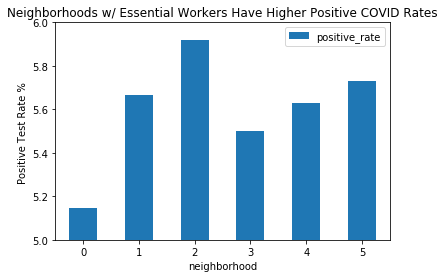

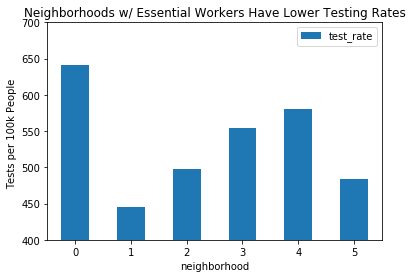

In [106]:
#plot differences 
ax1 = avg_rates.plot.bar(y='positive_rate',rot=0)
ax1.set_ylim(5,6)
ax1.set_ylabel('Positive Test Rate % ')
ax1.set_title('Neighborhoods w/ Essential Workers Have Higher Positive COVID Rates')

ax2 = avg_rates.plot.bar(y='test_rate',rot=0)
ax2.set_ylim(400,700)
ax2.set_ylabel('Tests per 100k People ')
ax2.set_title('Neighborhoods w/ Essential Workers Have Lower Testing Rates')

#axes = avg_rates.plot.bar( rot=0, subplots=True)
#axes[1].legend(loc=2)